## Imports


In [1]:
import psycopg2
import matplotlib.pyplot as plt
import numpy as np

# Conexión con PostgreSQL


In [2]:
conectado = False
while not conectado:
    try:
        conn = psycopg2.connect(
            host="postgres",
            database="covid",
            user="postgres",
            password="12345")
        cursor = conn.cursor()
        conectado = True
    except psycopg2.OperationalError:
        pass

## Obtención de datos
#### Se usó una base de datos con 500.000 registros de todo el país

In [3]:
query1 = "select count(*) from datos where nombre_municipio like '%BARRANQUILLA%' and "
query2 = "select count(*) from datos where recuperado like "

hombres = []
mujeres = []
recuperados = []
fallecidos = []
labels = []
tipos_contagiados = []

edad=0
salto_edad=10
sw=True
while sw:
    q_edad = "edad > "+str(edad)+" and edad <= " +str(edad+salto_edad) +" "
    
    q = query1 +  q_edad + "and sexo = 'F'"
    cursor.execute(q)
    cant = cursor.fetchall()[0][0]
    mujeres.append(cant)
    
    q = query1 +  q_edad + "and sexo = 'M'"
    cursor.execute(q)
    cant = cursor.fetchall()[0][0]
    hombres.append(cant)
    
    q = query2 + "'%Recuperado%' and " +q_edad
    cursor.execute(q)
    cant = cursor.fetchall()[0][0]
    recuperados.append(cant)
    
    q = query2 + "'%Fallecido%' and " +q_edad
    cursor.execute(q)
    cant = cursor.fetchall()[0][0]
    fallecidos.append(cant)
    
    labels.append(str(edad) +"-" +str(edad+salto_edad))
    
    edad += salto_edad
    if edad > 100:
        sw = False
query = "select count(*) from datos where tipo_contagio="

q = query + "'Comunitaria'"
cursor.execute(q)
cant = cursor.fetchall()[0][0]
tipos_contagiados.append(cant)

q = query + "'En estudio'"
cursor.execute(q)
cant = cursor.fetchall()[0][0]
tipos_contagiados.append(cant)

q = query + "'Importado'"
cursor.execute(q)
cant = cursor.fetchall()[0][0]
tipos_contagiados.append(cant)

q = query + "'Relacionado'"
cursor.execute(q)
cant = cursor.fetchall()[0][0]
tipos_contagiados.append(cant)

cursor.close()
conn.close()

## Visualización

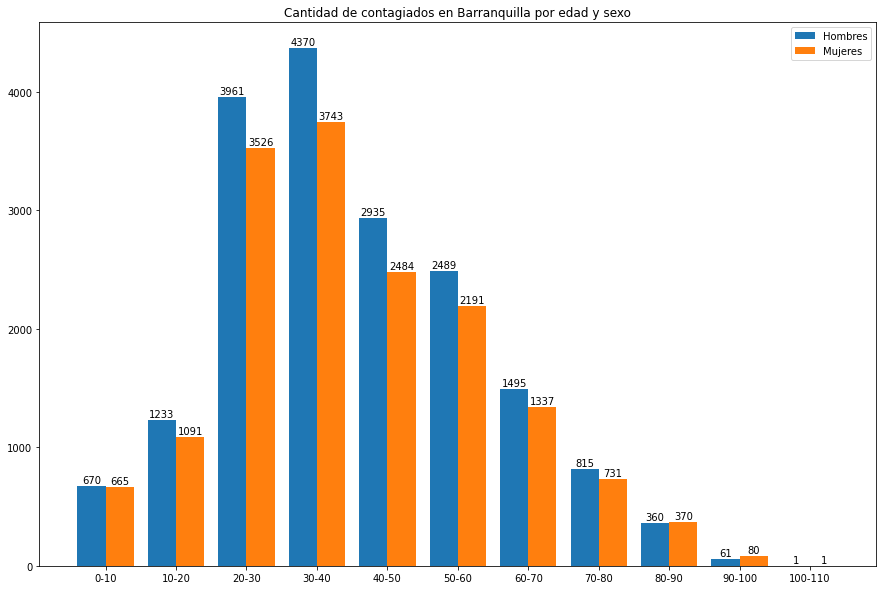

In [4]:
x = np.arange(len(labels))
ancho = 0.4
fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - ancho/2, hombres, ancho, label="Hombres")
rects2 = ax.bar(x + ancho/2, mujeres, ancho, label="Mujeres")
ax.set_title('Cantidad de contagiados en Barranquilla por edad y sexo')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)
plt.show()

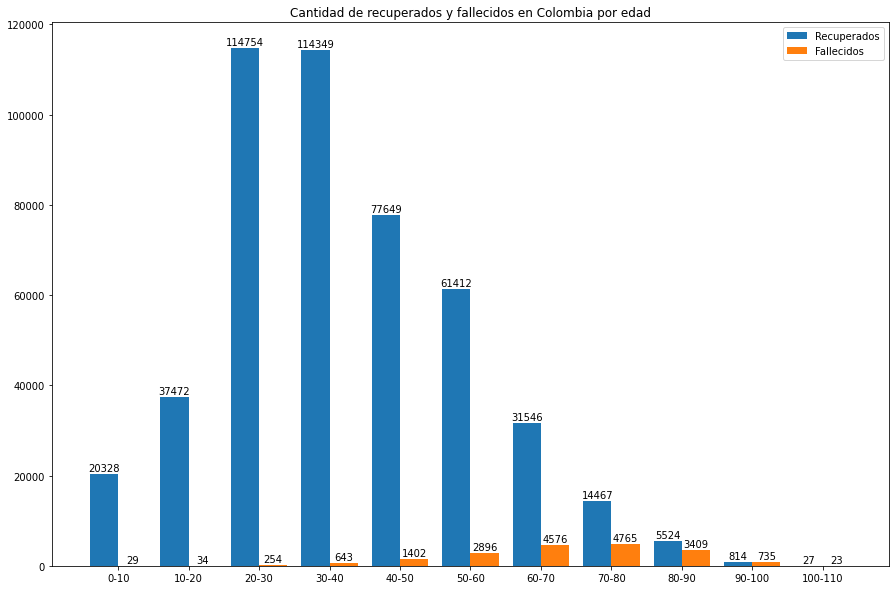

In [5]:
x = np.arange(len(labels))
ancho = 0.4
fig, ax = plt.subplots(figsize=(15,10))
rects1 = ax.bar(x - ancho/2, recuperados, ancho, label="Recuperados")
rects2 = ax.bar(x + ancho/2, fallecidos, ancho, label="Fallecidos")
ax.set_title('Cantidad de recuperados y fallecidos en Colombia por edad')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=1)
ax.bar_label(rects2, padding=1)
plt.show()

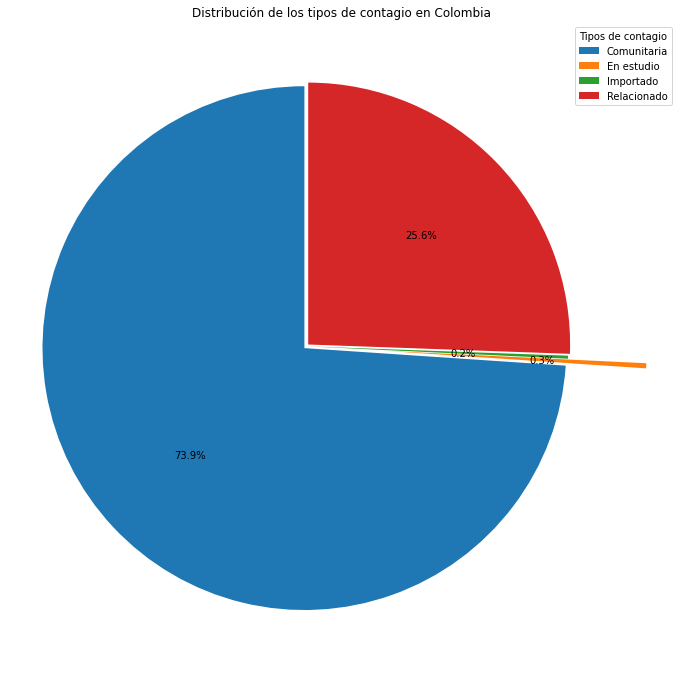

In [6]:
labels = ['Comunitaria', 'En estudio', 'Importado', 'Relacionado']

explode = (0.01, 0.3, 0, 0.01)

fig, ax = plt.subplots(figsize=(12,12))
ax.pie(tipos_contagiados, explode=explode, autopct='%1.1f%%',
        shadow=False, startangle=90)
plt.legend(title = "Tipos de contagio",labels=labels)
ax.axis('equal')
ax.set_title("Distribución de los tipos de contagio en Colombia")

plt.show()